# IMC using Linear Regression
**Antes de começar entenda o problema**

Nesta seção, você vai usar a regressão linear para prever a expectativa de vida a partir do índice de massa corporal (IMC). Antes de fazer isso, vamos dar uma olhada nas ferramentas necessárias para construir esse modelo.

## Imports

In [13]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

## Prepare Principal Directory

In [14]:
import os


def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [15]:
prepare_directory_work(end_directory='notebooks')

'/home/campos/projects/artificial_inteligence/machine_learning/supervised_learning/linear_regression/notebooks'

## Cell Format

In [16]:
# hide_code
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data
- Colunas
    - **Country** – O país em que a pessoa nasceu.
    - **Life expectancy** – A expectativa de vida média ao nascer para uma pessoa nesse país.
    - **BMI** – O IMC médio para homens nesse país

In [18]:
%%time

bmi_life_data = pd.read_csv('data/raw/life_expectancy.csv',
                    sep=',',
                    encoding='utf-8')

CPU times: user 3.53 ms, sys: 0 ns, total: 3.53 ms
Wall time: 2.87 ms


In [20]:
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,65.0,19.1
1,Afghanistan,59.9,18.6
2,Afghanistan,59.9,18.1
3,Afghanistan,59.5,17.6
4,Afghanistan,59.2,17.2


In [22]:
# rows and columns
bmi_life_data.shape

(2938, 3)

In [23]:
bmi_life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 3 columns):
country            2938 non-null object
life_expectancy    2928 non-null float64
bmi                2904 non-null float64
dtypes: float64(2), object(1)
memory usage: 69.0+ KB


## Name Adaption of Features
- Name dont must capitalize
- lower case
- without spaces

In [19]:
bmi_life_data.columns

Index(['Country', 'Life expectancy ', ' BMI '], dtype='object')

In [34]:
# Renamed columns
bmi_life_data.columns = ['country',
                        'life_expectancy',
                        'bmi']

display(bmi_life_data.columns)

Index(['country', 'life_expectancy', 'bmi'], dtype='object')

## Missing values

In [61]:
# return TRUE if collumn contains values missing

missing = bmi_life_data.isnull().any()
print(missing)

country            False
life_expectancy    False
bmi                False
dtype: bool


In [62]:
bmi_life_data.isnull().sum()

country            0
life_expectancy    0
bmi                0
dtype: int64

In [59]:
bmi_life_data.dropna(inplace=True)

---

## Prepare Tranning

In [79]:
# [[]] bidimensional 
X = bmi_life_data[['bmi']] 

# Target [[]] bidimensional 
y = bmi_life_data[['life_expectancy']]

## Split Data

In [88]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y, 
                                    test_size=0.20)

print(f"X_train:\n{X_train.head(1)}\n")
print(f"y_train:\n{y_train.head(1)}\n")
print(f"X_test:\n{X_test.head(1)}\n")
print(f"y_test:\n{y_test.head(1)}")

X_train:
     bmi
146  5.6

y_train:
     life_expectancy
146             72.2

X_test:
     bmi
561 31.9

y_test:
     life_expectancy
561             75.8


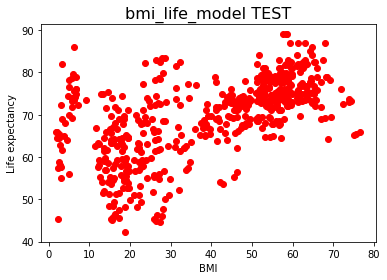

In [81]:
# now we are going to plot the points
plt.scatter(X_test, y_test, color='red')
plt.title('bmi_life_model TEST', fontsize=16)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.draw()

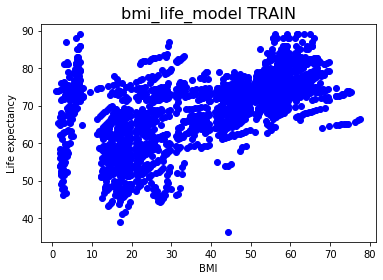

In [82]:
# now we are going to plot the points and the model obtained
plt.scatter(X_train, y_train, color='blue')
plt.title('bmi_life_model TRAIN', fontsize=16)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.draw()

## Create Model

In [96]:
model_lr = LinearRegression()

## Train Model

In [95]:
model_lr = model_lr.fit(X_train, y_train)

Finalmente, com o modelo treinado, podemos realizar previsões e ver quão próximas elas estão da realidade.

Podemos fazer previsões com os **dados de teste** ou senão com algum valor do eixo X (IMC).

## Make Predictions
Lembre: você esta fazendo predições para o eixo y (variável DEPENDENTE)

In [92]:
y_pred_model = model_lr.predict(y_test)

## Make Predictions using values that are not yet in the database
Faça uma previsão usando um IMC de 21.07931 e atribua o resultado à variável laos_life_exp.

In [93]:
laos_life_exp = model_lr.predict([[21.07931]])
print(f'The Predict life expectancy to Laos is: {laos_life_exp} years.')

The Predict life expectancy to Laos is: [[64.78010413]] years.


---